In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

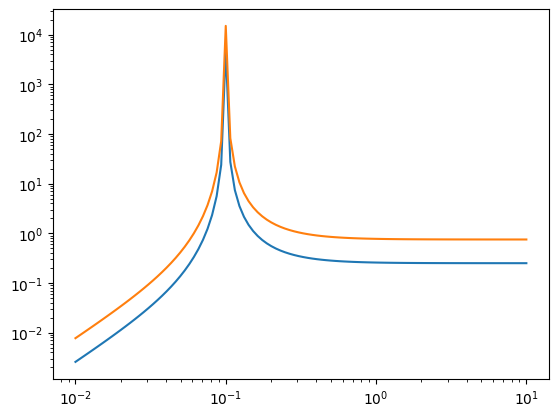

In [2]:
wB = 0.1
Gamma = 0.001

SigmaBMax = 2*wB**4 / (wB**2 * Gamma**2 + Gamma**4 / 16) # Wrong I think, but mathematica wont give an answer?
def SigmaB(w):
    return w**2 * (w**2 + wB**2) / ((w**2 - wB**2 - 0.25*Gamma**2)**2 + w**2 * Gamma**2)


def crossSec1(mu_i, w):
    return mu_i * mu_i * SigmaB(w)

def crossSec2(mu_i, w):
    # return 0.5 * mu_i * mu_i * SigmaB(w)
    return (1 - mu_i * mu_i) * SigmaB(w)

mu = 0.5
ws = np.logspace(-2, 1, 100)

fig, ax = plt.subplots()

ax.loglog(ws, crossSec1(mu, ws))
ax.loglog(ws, crossSec2(mu, ws))

plt.show()

In [32]:
# current method
def crossSecAcceptReject(mu, w, crossSecFunc):
    max = crossSecFunc(mu, wB)

    prob = crossSecFunc(mu, w)

    x = random.uniform(0, max)

    if x < prob:
        return True
    else:
        return False

def decideCrossSec(mu, w):
    cs1Happens = crossSecAcceptReject(mu, w, crossSec1)
    cs2Happens = crossSecAcceptReject(mu, w, crossSec2)

    outVal = 0

    found = False

    while (not found):
        if (cs1Happens):
            found = True
            outVal = 1
        
        if (cs2Happens):
            found = True
            outVal = 2

        if (cs1Happens and cs2Happens):
            found = True
            x = random.random()

            if (x < 0.5):
                outVal = 1
            else:
                outVal = 2

        if (not cs1Happens and not cs2Happens):
            continue

    return outVal

N = 20

oneChosen = np.zeros(N-2)
twoChosen = np.zeros(N-2)

muVals = np.linspace(-1, 1, N)[1:-1]

for i, mu in enumerate(muVals):
    w = 0.15

    counts = np.zeros(3)

    for j in range(1000):
        ind = decideCrossSec(mu, w)
        counts[ind] += 1

    plt.stairs(counts, np.arange(4))
    print(counts)

    oneChosen[i] = counts[1]
    twoChosen[i] = counts[2]

plt.show()

plt.plot(muVals, oneChosen)
plt.plot(muVals, twoChosen)

KeyboardInterrupt: 

[   0. 1000.    0.]
[  0. 810. 190.]
[  0. 640. 360.]
[  0. 468. 532.]
[  0. 328. 672.]
[  0. 206. 794.]
[  0. 136. 864.]
[  0.  72. 928.]
[  0.  32. 968.]
[  0.   3. 997.]
[   0.    0. 1000.]
[  0.  17. 983.]
[  0.  58. 942.]
[  0. 126. 874.]
[  0. 209. 791.]
[  0. 362. 638.]
[  0. 486. 514.]
[  0. 627. 373.]
[  0. 813. 187.]
[   0. 1000.    0.]


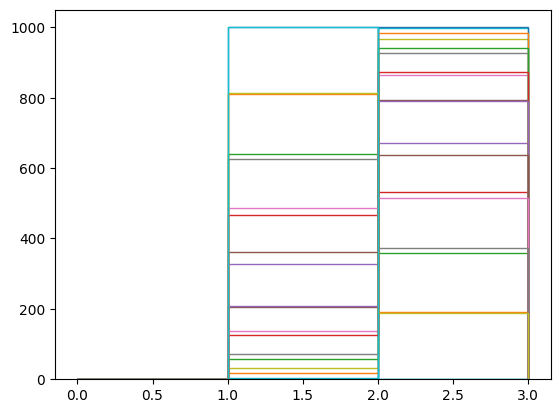

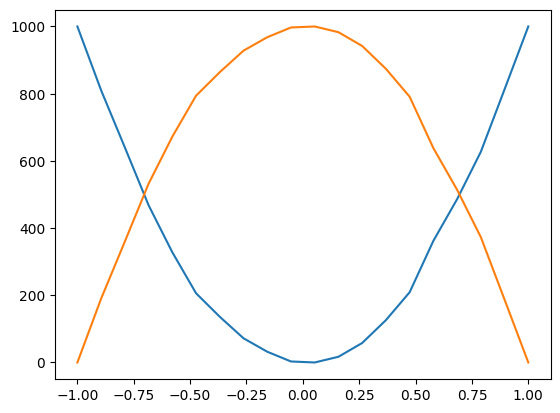

In [31]:
# maybe correct method
def crossSecAcceptReject(mu, w, crossSecFunc):
    max = crossSecFunc(mu, wB)

    prob = crossSecFunc(mu, w)

    x = random.uniform(0, max)

    if x < prob:
        return True
    else:
        return False

def decideCrossSec(mu, w):
    cs1prob = crossSec1(mu, w)
    cs2prob = crossSec2(mu, w)

    x = random.uniform(0, cs1prob + cs2prob)

    outVal = 0

    if (x < cs1prob):
        outVal = 1
    else:
        outVal = 2

    return outVal

N = 20

oneChosen = np.zeros(N)
twoChosen = np.zeros(N)

muVals = np.linspace(-1, 1, N)

for i, mu in enumerate(muVals):
    w = 0.15

    counts = np.zeros(3)

    for j in range(1000):
        ind = decideCrossSec(mu, w)
        counts[ind] += 1

    plt.stairs(counts, np.arange(4))
    print(counts)

    oneChosen[i] = counts[1]
    twoChosen[i] = counts[2]

plt.show()

plt.plot(muVals, oneChosen)
plt.plot(muVals, twoChosen)

# plt.ylim([0, 1000])